Importing dataset

In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip"
!unzip -qo Lung_cancer_dataset.zip
!rm Lung_cancer_dataset.zip

--2022-10-04 14:31:20--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/Lung_cancer_dataset.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.19
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156629884 (149M) [application/x-zip-compressed]
Saving to: ‘Lung_cancer_dataset.zip’

Lung_cancer_dataset 100%[===================>] 149.37M  45.1MB/s    in 3.3s    

2022-10-04 14:31:24 (45.1 MB/s) - ‘Lung_cancer_dataset.zip’ saved [156629884/156629884]



In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

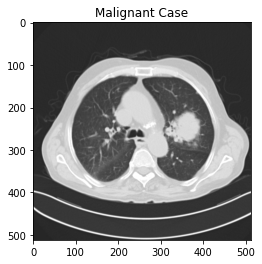

In [ ]:
img = cv2.imread("Lung_cancer_dataset/Train/Malignant cases/Malignant case (11).jpg")
plt.title("Malignant Case")
plt.imshow(img)

In [ ]:
Image Preprocessing

In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train", 
                                                   target_size = (img_width, img_height), 
                                                   color_mode="grayscale", 
                                                   class_mode="categorical", 
                                                   batch_size = 16, 
                                                   subset = "training", 
                                                   shuffle="True")

Found 970 images belonging to 3 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Train",
                                                        target_size = (img_width, img_height),
                                                        color_mode="grayscale",
                                                        class_mode="categorical",
                                                        batch_size = 16,
                                                        subset = "validation")

Found 107 images belonging to 3 classes.


In [ ]:
train_data_generator.next()[1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

Building a CNN Architechture


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32,activation="relu"))


model.add(Dense(3, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [ ]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)]

Execute the model for appropriate number of epochs

In [ ]:
history=model.fit(train_data_generator, 
                  steps_per_epoch=len(train_data_generator), 
                  epochs=10, 
                  validation_data=validation_data_generator, 
                  validation_steps = len(validation_data_generator), 
                  callbacks=my_callback)

Epoch 1/10
61/61 [==============================] - 18s 104ms/step - loss: 0.9425 - accuracy: 0.5340 - val_loss: 0.9692 - val_accuracy: 0.4579
Epoch 2/10
61/61 [==============================] - 6s 100ms/step - loss: 0.8155 - accuracy: 0.6536 - val_loss: 0.9788 - val_accuracy: 0.4860
Epoch 3/10
61/61 [==============================] - 6s 98ms/step - loss: 0.5736 - accuracy: 0.7876 - val_loss: 0.8234 - val_accuracy: 0.6729
Epoch 4/10
61/61 [==============================] - 6s 100ms/step - loss: 0.3728 - accuracy: 0.8546 - val_loss: 0.8667 - val_accuracy: 0.7009
Epoch 5/10
61/61 [==============================] - 6s 100ms/step - loss: 0.3017 - accuracy: 0.8835 - val_loss: 1.0982 - val_accuracy: 0.6168
Epoch 6/10
61/61 [==============================] - 6s 98ms/step - loss: 0.2451 - accuracy: 0.9021 - val_loss: 1.1292 - val_accuracy: 0.6542
Epoch 7/10
61/61 [==============================] - 6s 99ms/step - loss: 0.2115 - accuracy: 0.9103 - val_loss: 0.7319 - val_accuracy: 0.7944
Epoch 8/

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="Lung_cancer_dataset/Test",
                                                  target_size = (img_width, img_height),
                                                  color_mode="grayscale",
                                                  class_mode="categorical",
                                                  batch_size = 10,
                                                  subset = "training")

Found 20 images belonging to 3 classes.


In [ ]:
test_data_generator.next()[1]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

accuracy vs. val_accuracy on line chart

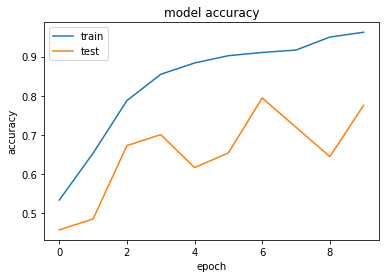

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


loss vs. val_loss on line chart

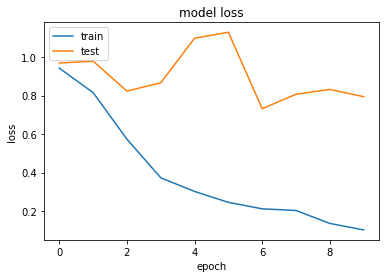

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Generating predictions on test_data

In [ ]:
x,y = test_data_generator.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

In [ ]:
cell_dict = {0:"Benign", 1:"Malignant", 2:"Normal"}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'Normal', 1: 'Normal', 2: 'Malignant', 3: 'Normal', 4: 'Normal', 5: 'Benign', 6: 'Malignant', 7: 'Malignant', 8: 'Malignant', 9: 'Benign'}
PREDICTIONS: {0: 'Normal', 1: 'Malignant', 2: 'Malignant', 3: 'Normal', 4: 'Normal', 5: 'Malignant', 6: 'Malignant', 7: 'Malignant', 8: 'Malignant', 9: 'Normal'}


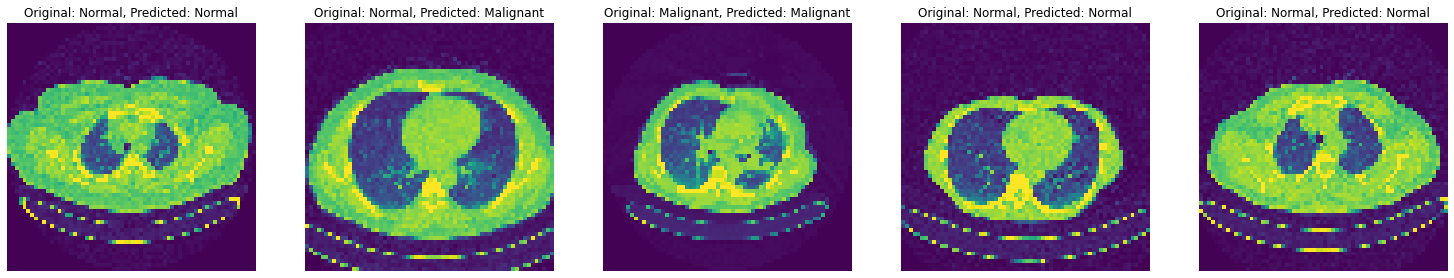

In [ ]:
plt.figure(figsize = (20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(np.squeeze(x[i]))
  
    
    plt.title('Original: {}, Predicted: {}'.format(actual_val[i], predictions[i]))
    plt.axis('Off')


plt.subplots_adjust(left=1.5, right=2.5, top=1)
plt.show()